In [38]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tensorflow as tf
from sklearn.utils.extmath import cartesian
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [3]:
data = pd.read_csv('ex1data1.txt', header=None)

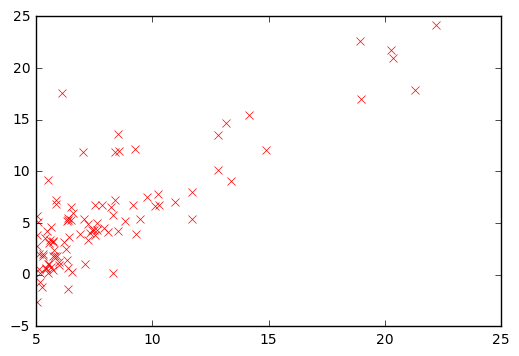

In [4]:
data_X = data[0]
data_Y = data[1]
data_M = data_X.shape[0]
plt.plot(data[0], data[1], 'rx')

# X0 needs to be appended to data_X
data_X = pd.concat( [
    pd.Series(np.ones(data_M)),
    data_X
    ],  axis = 1)
data_X.columns = [0, 1]
#print("X shape:{}".format(data_X.shape))

# Cleanup data_Y
data_Y = data_Y.reshape(data_Y.shape[0], 1)
#print("Y shape:{}".format(data_Y.shape))

In [5]:
# Tweak params
learning_rate = 0.01
iterations = 1500

# Gradient Descent Code
tf.reset_default_graph() #reset all placeholder's if we are running this cell multiple times

x = tf.placeholder(tf.float64)
y = tf.placeholder(tf.float64) 
m = tf.constant(data_M , dtype=tf.float64)

# h(x) = 𝜃'x
theta = tf.Variable(tf.zeros([2, 1], dtype=tf.float64), dtype=tf.float64)
hx = tf.matmul(x, theta)

J = tf.div(tf.reduce_mean(tf.square(tf.sub(hx, y))),2.0)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(J)

with tf.Session() as sess:    
    J_hist = np.zeros(iterations)
    sess.run(tf.initialize_all_variables())
    
    for i in range(iterations):
        _, J_hist[i] = sess.run([optimizer, J], feed_dict={x: data_X, y : data_Y})
    
    finalTheta = sess.run(theta)

#print("final cost:{}".format(c))
print("Theta found by Gradient Descent:{}, {}".format(finalTheta[0][0], finalTheta[1][0]))


Theta found by Gradient Descent:-3.6302914233300645, 1.1663623487207446


In [6]:
predict1 = np.matmul([1, 3.5], finalTheta)
print("For population = 35,000 we predict a profit of {}".format(predict1*10000))

predict2 = np.matmul([1, 7], finalTheta)
print("For population = 70,000 we predict a profit of {}".format(predict2*10000))


For population = 35,000 we predict a profit of [ 4519.76797193]
For population = 70,000 we predict a profit of [ 45342.45017715]


(97, 2)
(2, 1)


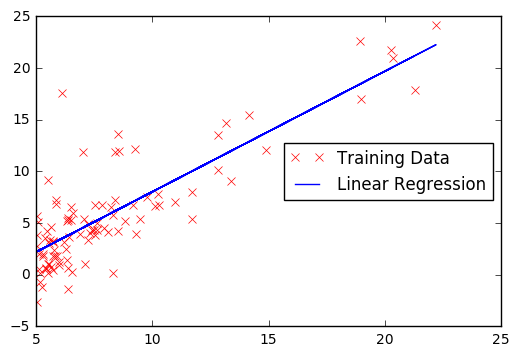

In [7]:
print(data_X.shape)
print(finalTheta.shape)

#np.mul(data_X, finalTheta)
plt.plot(data[0], data[1], 'rx', label='Training Data')
plt.plot(data_X[1], np.matmul(data_X.values , finalTheta), '-',label='Linear Regression')
plt.legend(loc='right')

100%|██████████| 10000/10000 [00:02<00:00, 3979.20it/s]


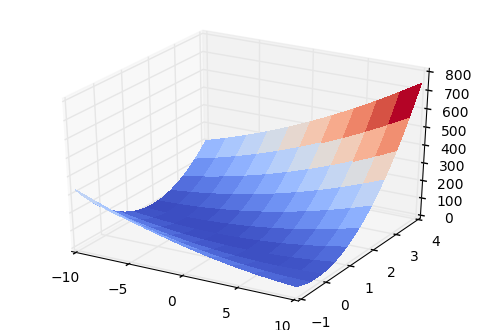

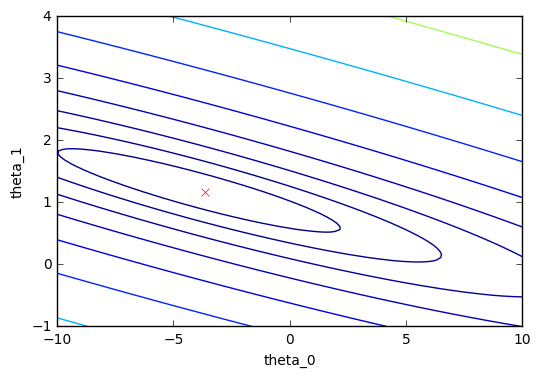

In [40]:
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-1,4,100)
theta0_v, theta1_v = np.meshgrid(theta0_vals, theta1_vals)

tf.reset_default_graph() #reset all placeholder's if we are running this cell multiple times


x = tf.placeholder(tf.float64)
y = tf.placeholder(tf.float64) 
m = tf.constant(data_M , dtype=tf.float64)

# h(x) = 𝜃'x
theta = tf.placeholder(tf.float64)
hx = tf.matmul(x, theta)

J = tf.div(tf.reduce_mean(tf.square(tf.sub(hx, y))),2.0)

J_vals = np.zeros([theta0_vals.shape[0], theta1_vals.shape[0]], dtype=np.float64)


with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    
    with tqdm(total=theta0_vals.shape[0]*theta1_vals.shape[0]) as pbar: #lets show progress when iterating.
        for i in range(theta0_vals.shape[0]):
            for j in range(theta1_vals.shape[0]):
                data_Theta = np.array([[theta0_v[i,j]],[theta1_v[i,j]]])
                J_vals[i,j] = sess.run(J,feed_dict={x: data_X, y:data_Y , theta: data_Theta})
                pbar.update()


fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(theta0_v, theta1_v, J_vals,cmap=cm.coolwarm,  linewidth=0,antialiased=False)

plt.figure()
plt.contour(theta0_v, theta1_v, J_vals, np.logspace(-2, 3, 20))
plt.xlabel('theta_0')
plt.ylabel('theta_1')

plt.plot(finalTheta[0], finalTheta[1], 'rx')
plt.show()
    

In [9]:
#

In [10]:
#

In [11]:
#

In [12]:
#

In [ ]:
#

In [ ]:
#

In [ ]:
#